## Avance Proyecto - Data Trackers
Juan Costa

Isaac Solis

Freddy Ponce

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely import geometry
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import pandas as pd
import folium
import json
%matplotlib inline

In [2]:
crimen=pd.read_csv("crimenydelito.csv")

In [3]:
bicis=pd.read_csv("recorridos-realizados-2021.csv")

In [4]:
covid=pd.read_csv("casos_covid19.csv")

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (10,11,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Covid Datasets

In [5]:
def rename_neighborhoods(barrio):
    if barrio == "COGHLAN":
        return "COGHLAND"
    elif barrio == "VILLA GRAL. MITRE":
        return "VILLA GRAL MITRE"
    elif barrio == "MONSERRAT":
        return "MONTSERRAT"
    elif barrio == "BOCA":
        return "LA BOCA"
    else:
        return barrio
    

In [6]:
covid.dropna(subset=['barrio'], inplace=True)

In [7]:
covid['comuna'] = covid['comuna'].astype(int)

In [8]:
cv=covid.groupby(['barrio']).count()
cv=cv.reset_index()
cv=cv[['barrio','numero_de_caso']]
cv["barrio"] =  cv["barrio"].apply(lambda x: rename_neighborhoods(x) )
cv

,barrio,numero_de_caso
0,AGRONOMIA,7190
1,ALMAGRO,71554
2,BALVANERA,75326
3,BARRACAS,50074
4,BELGRANO,74201
5,LA BOCA,26272
6,BOEDO,25668
7,CABALLITO,95718
8,CHACARITA,17421
9,COGHLAND,10732


In [9]:
barrios_cv = set(cv["barrio"])

### Crimen Datasets


In [13]:
crimen=pd.read_csv("crimenydelito.csv")
#crimen['comuna']=crimen['comuna'].str[7:9]
#crimen['comuna'] = crimen['comuna'].astype(int)
#crimen['tipo_delito'].value_counts()

In [14]:
crimen['tipo_delito'].unique()

array(['Lesiones Seg Vial', 'Robo (Con violencia)',
       'Hurto (Sin violencia)', 'Robo De Autopartes',
       'Hurto De Chapa Patente', 'Hurto Automotor', 'Hurto De Rueda',
       'Robo Automotor', 'Robo De Rueda', 'Hurto De Moto / Ciclomotor',
       'Robo De Moto / Ciclomotor', 'Hurto De Autopartes',
       'Hurto De Bicicleta', 'Robo De Bicicleta', 'Robo De Chapa Patente',
       'Homicidio Doloso', 'Homicidio Seg Vial'], dtype=object)

In [15]:
def classify_delitos(x):
    
    con_violencia = ['Lesiones Seg Vial', 'Robo (Con violencia)','Homicidio Doloso', 'Homicidio Seg Vial']
    if x in con_violencia:
        return "Delito con violencia"
    else:
        return "Delito sin violencia"

In [16]:
crimen['delito'] =crimen['tipo_delito'].apply(lambda x: classify_delitos(x))

In [17]:
crimen_violencia = crimen[crimen["delito"]=="Delito con violencia"]
crimen_sinviolencia = crimen[crimen["delito"]!="Delito con violencia"]

In [18]:
cr1=crimen_violencia.groupby(['barrio']).count()
cr2=crimen_sinviolencia.groupby(['barrio']).count()
cr1=cr1.reset_index()
cr2=cr2.reset_index()
cr1=cr1[['barrio','delito']] #Con violencia
cr2=cr2[['barrio','delito']] #Sin violencia
df1=pd.merge(cr1,cr2, how='outer',on="barrio").rename(columns={"delito_x":"delito_violento", "delito_y":"delito_no_violento"})
df1['delito_no_violento']=df1['delito_no_violento'].fillna(0)
df1

,barrio,delito_violento,delito_no_violento
0,AGRONOMIA,363,314.0
1,ALMAGRO,4583,2876.0
2,BALVANERA,7422,5447.0
3,BARRACAS,2607,1780.0
4,BELGRANO,3415,2985.0
5,BOEDO,1606,1544.0
6,CABALLITO,5094,3896.0
7,CHACARITA,1327,791.0
8,COGHLAND,34,0.0
9,COLEGIALES,1175,1021.0


### Merge de Covid y Delitos

In [19]:
df2=pd.merge(df1,cv, how='outer',on="barrio")
df2

,barrio,delito_violento,delito_no_violento,numero_de_caso
0,AGRONOMIA,363,314.0,7190
1,ALMAGRO,4583,2876.0,71554
2,BALVANERA,7422,5447.0,75326
3,BARRACAS,2607,1780.0,50074
4,BELGRANO,3415,2985.0,74201
5,BOEDO,1606,1544.0,25668
6,CABALLITO,5094,3896.0,95718
7,CHACARITA,1327,791.0,17421
8,COGHLAND,34,0.0,10732
9,COLEGIALES,1175,1021.0,28467


### Dataset Salud

In [20]:
salud=pd.read_csv("centros_de_salud.csv")


In [21]:
sal=salud.groupby(['barrio']).count()
sal=sal.reset_index()
sal=sal[['barrio','SERVICIOS_']]

### Merge: Covid, delitos y Salud

In [22]:
sal["barrio"] =  sal["barrio"].apply(lambda x: rename_neighborhoods(x))
df=pd.merge(df2,sal, how='outer').rename(columns={"SERVICIOS_":"num_puntos_salud"})
df=df.fillna(0)
df

,barrio,delito_violento,delito_no_violento,numero_de_caso,num_puntos_salud
0,AGRONOMIA,363,314.0,7190,0.0
1,ALMAGRO,4583,2876.0,71554,1.0
2,BALVANERA,7422,5447.0,75326,1.0
3,BARRACAS,2607,1780.0,50074,6.0
4,BELGRANO,3415,2985.0,74201,0.0
5,BOEDO,1606,1544.0,25668,0.0
6,CABALLITO,5094,3896.0,95718,0.0
7,CHACARITA,1327,791.0,17421,0.0
8,COGHLAND,34,0.0,10732,0.0
9,COLEGIALES,1175,1021.0,28467,0.0


### Dataset Bicis

In [23]:
locations_bicis = pd.read_excel("./nuevas-estaciones-bicicletas-publicas.xlsx") #Ubicaciones Lat-Lon de Bicis

In [24]:
bicis['Nombre de estación de inicio'].nunique()

233

In [25]:
from shapely import geometry

polygon = [(-1571236.8349707182, 8989180.222117377), (1599362.9654156454, 8924317.946336618), (-1653179.0745812152, 8922145.163675062), (-1626237.6614402141, 8986445.107619021)]

Point_X = -1627875.474
Point_Y = 8955472.968

line = geometry.LineString(polygon)
point = geometry.Point(Point_X, Point_Y)
polygon = geometry.Polygon(line)

print(polygon.contains(point))

True


In [26]:
import json
from shapely.geometry import shape, GeometryCollection

with open("barrios.geojson") as f:
    features = json.load(f)["features"]


In [27]:
features

[{'type': 'Feature',
  'properties': {'barrio': 'CHACARITA',
   'comuna': 15,
   'perimetro': 7724.85295457,
   'area': 3115707.10627},
  'geometry': {'type': 'Polygon',
   'coordinates': [[[-58.4528200492791, -34.5959886570639],
     [-58.453655193137, -34.5965557163041],
     [-58.4537674321647, -34.5966342484152],
     [-58.4538163134148, -34.5966684788922],
     [-58.4547947928051, -34.5973527273644],
     [-58.4554840815948, -34.5978347610252],
     [-58.4559204833296, -34.5976953435829],
     [-58.4560093721285, -34.5976669530232],
     [-58.4560576047802, -34.5976515472868],
     [-58.4562363723257, -34.5975900748435],
     [-58.4564940053845, -34.597501563774],
     [-58.4570733158433, -34.5973024999733],
     [-58.4576142986162, -34.5971165306991],
     [-58.4578298572666, -34.5970394940224],
     [-58.4579314199407, -34.5970031094655],
     [-58.4579383597537, -34.5970006235554],
     [-58.457939151188, -34.5970004324802],
     [-58.4580314840712, -34.5969781271249],
     [-5

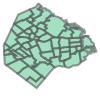

In [28]:
GeometryCollection([shape(feature["geometry"]).buffer(0) for feature in features])

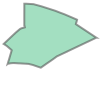

In [29]:
[shape(feature["geometry"]).buffer(0) for feature in features][0]

In [30]:
names = [feature["properties"]["barrio"] for feature in features]

In [31]:
bicis.columns

Index(['ID', 'Estado cerrado', 'Duración', 'Id de estación de inicio',
       'Fecha de inicio', 'Nombre de estación de inicio', 'Fecha de fin',
       'Id de estación de fin de viaje', 'Nombre de estación de fin de viaje',
       'ID de ciclista', 'Tipo de ciclista', 'Modelo de bicicleta',
       'Origen de viaje'],
      dtype='object')

In [32]:
bicis[bicis["Id de estación de inicio"]==131]

,ID,Estado cerrado,Duración,Id de estación de inicio,Fecha de inicio,Nombre de estación de inicio,Fecha de fin,Id de estación de fin de viaje,Nombre de estación de fin de viaje,ID de ciclista,Tipo de ciclista,Modelo de bicicleta,Origen de viaje
0,11204995,NORMAL,437,131,2021-06-02 16:14:35,131- HOSPITAL DE CLÍNICAS,2021-06-02 16:21:52,38.0,038 - Plaza Libertad,119795,MEMBER,ICONIC,CODE
471,11204222,NORMAL,668,131,2021-06-02 15:12:13,131- HOSPITAL DE CLÍNICAS,2021-06-02 15:23:21,22.0,022 - Arenales,121442,MEMBER,ICONIC,CODE
512,11204177,NORMAL,699,131,2021-06-02 15:08:07,131- HOSPITAL DE CLÍNICAS,2021-06-02 15:19:46,66.0,066 - Billinghurst,59512,MEMBER,ICONIC,CODE
818,11203771,NORMAL,608,131,2021-06-02 14:26:42,131- HOSPITAL DE CLÍNICAS,2021-06-02 14:36:50,9.0,009 - Parque Las Heras,746114,MEMBER,ICONIC,CODE
835,11203745,NORMAL,60,131,2021-06-02 14:24:57,131- HOSPITAL DE CLÍNICAS,2021-06-02 14:25:57,131.0,131- HOSPITAL DE CLÍNICAS,772182,MEMBER,ICONIC,CODE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328014,9647113,NORMAL,1424,131,2021-01-01 02:49:50,131- HOSPITAL DE CLÍNICAS,2021-01-01 03:13:34,199.0,199 - ESTADOS UNIDOS Y BOEDO,682990,MEMBER,ICONIC,CODE
1328079,9647046,NORMAL,674,131,2021-01-01 02:36:44,131- HOSPITAL DE CLÍNICAS,2021-01-01 02:47:58,71.0,071 - CERRITO,710096,MEMBER,ICONIC,CODE
1328230,9646894,NORMAL,1017,131,2021-01-01 02:08:19,131- HOSPITAL DE CLÍNICAS,2021-01-01 02:25:16,9.0,009 - Parque Las Heras,567716,MEMBER,ICONIC,CODE
1328317,9646807,NORMAL,951,131,2021-01-01 01:49:22,131- HOSPITAL DE CLÍNICAS,2021-01-01 02:05:13,124.0,124 - UGARTECHE,291311,MEMBER,ICONIC,CODE


In [33]:
polygons = [shape(feature["geometry"]).buffer(0) for feature in features]

In [34]:
#line = geometry.LineString(polygon)
point = geometry.Point(Point_X, Point_Y)
polygon = geometry.Polygon(line)

print(polygon.contains(point))

True


In [35]:
locations_bicis

,WKT,id,codigo,nombre,ubicacion,tipo,horario,anclajes_t
0,POINT (-58.3747109506359 -34.5924239181221),2,2,002 - Retiro I,"Ramos Mejia, Jose Maria, Dr. Av. & Del Liberta...",AUTOMÁTICA,Estación automática: disponibilidad las 24 horas,20
1,POINT (-58.368256111128 -34.611033074021),3,3,003 - ADUANA,Moreno & Av Paseo Colon,AUTOMÁTICA,Estación automática: disponibilidad las 24 horas,20
2,POINT (-58.3687766674259 -34.6018228613782),4,4,004 - Plaza Roma,Lavalle & Bouchard,AUTOMÁTICA,Estación automática: disponibilidad las 24 horas,20
3,POINT (-58.420951914897 -34.5805498216605),5,5,005 - Plaza Italia,Av. Sarmiento 2601,AUTOMÁTICA,Estación automática: disponibilidad las 24 horas,42
4,POINT (-58.3697538990917 -34.6285274659984),6,6,006 - Parque Lezama,"Avenida Martin Garcia, 295",AUTOMÁTICA,Estación automática: disponibilidad las 24 horas,20
...,...,...,...,...,...,...,...,...
224,POINT (-58.4594980806633 -34.5445021121101),396,227,227 -Club Ciudad de Buenos Aires,Miguel Sanchez y Av Libertadores,AUTOMÁTICA,Estación automática: disponibilidad las 24 horas,16
225,POINT (-58.3747959781335 -34.6098020140517),398,16,016 - Legislatura,"169 Peru & Roca, Julio A., Presidente Diagonal...",AUTOMÁTICA,Estación automática: disponibilidad las 24 horas,20
226,POINT (-58.370711799739 -34.6089370142298),401,61,061-Ministerio de Economia,"Balcarce & Yrigoyen, Hipolito Av.",AUTOMÁTICA,Estación automática: disponibilidad las 24 horas,24
227,POINT (-58.3788579541696 -34.5824223699167),403,393,393 - Barrio 31,Carlos H. Perette 11,AUTOMÁTICA,Estación automática: disponibilidad las 24 horas,24


In [36]:
lat = locations_bicis.iloc[1,0].replace("(","").replace(")","").split()[1]
lon = locations_bicis.iloc[1,0].replace("(","").replace(")","").split()[2]

In [37]:
lat

'-58.368256111128'

In [38]:
lon

'-34.611033074021'

In [39]:
def verify_barrio(str_location,polygons,names):
    lat = float(str_location.replace("(","").replace(")","").split()[1])
    lon = float(str_location.replace("(","").replace(")","").split()[2])
    point = geometry.Point(lat, lon)
    
    for i in range(len(polygons)):
        polygon = polygons[i]
        if polygon.contains(point):
            return names[i]
    return False


In [40]:
verify_barrio('POINT (-58.3646813208631 -34.6054886649491)',polygons,names)

False

In [41]:
locations_bicis["barrio"]  = locations_bicis["WKT"].apply(lambda x: verify_barrio(x,polygons,names))

locations_bicis["barrio"] = locations_bicis["barrio"].apply(lambda x: "PUERTO MADERO" if x == False else x)

In [42]:
id_barrio_estacion = locations_bicis[["codigo","barrio"]]

In [43]:
bicis_2 = bicis.merge(id_barrio_estacion,left_on="Id de estación de inicio",right_on="codigo").rename(columns={"barrio":"barrio_inicio"})
del bicis_2["codigo"]

In [44]:
bicis_2 = bicis_2.merge(id_barrio_estacion,left_on="Id de estación de fin de viaje",right_on="codigo").rename(columns={"barrio":"barrio_llegada"})
del bicis_2["codigo"]

In [45]:
pickups = bicis_2[["barrio_inicio","ID"]].groupby("barrio_inicio").count().reset_index().rename(columns={"ID":"num_pickups"})

In [46]:
dropoffs = bicis_2[["barrio_llegada","ID"]].groupby("barrio_llegada").count().reset_index().rename(columns={"ID":"num_dropoffs"})

In [47]:
pickups["barrio_inicio"] =  pickups["barrio_inicio"].apply(lambda x: rename_neighborhoods(x))
dropoffs["barrio_llegada"] =  dropoffs["barrio_llegada"].apply(lambda x: rename_neighborhoods(x))

In [48]:
df = df.merge(pickups,how="outer",left_on="barrio",right_on="barrio_inicio")
del df["barrio_inicio"]

In [49]:
df = df.merge(dropoffs,how="outer",left_on="barrio",right_on="barrio_llegada")
del df["barrio_llegada"]

In [50]:
df.fillna(0,inplace=True)

In [51]:
df_n=df[['delito_violento','delito_no_violento', 'numero_de_caso', 'num_puntos_salud', 'num_pickups', 'num_dropoffs']]
df_n

,delito_violento,delito_no_violento,numero_de_caso,num_puntos_salud,num_pickups,num_dropoffs
0,363,314.0,7190,0.0,0.0,0.0
1,4583,2876.0,71554,1.0,73677.0,73142.0
2,7422,5447.0,75326,1.0,79557.0,80277.0
3,2607,1780.0,50074,6.0,11264.0,11472.0
4,3415,2985.0,74201,0.0,28511.0,29477.0
5,1606,1544.0,25668,0.0,10139.0,10282.0
6,5094,3896.0,95718,0.0,43251.0,42131.0
7,1327,791.0,17421,0.0,15593.0,12544.0
8,34,0.0,10732,0.0,13969.0,14440.0
9,1175,1021.0,28467,0.0,9989.0,9881.0


In [52]:
df

,barrio,delito_violento,delito_no_violento,numero_de_caso,num_puntos_salud,num_pickups,num_dropoffs
0,AGRONOMIA,363,314.0,7190,0.0,0.0,0.0
1,ALMAGRO,4583,2876.0,71554,1.0,73677.0,73142.0
2,BALVANERA,7422,5447.0,75326,1.0,79557.0,80277.0
3,BARRACAS,2607,1780.0,50074,6.0,11264.0,11472.0
4,BELGRANO,3415,2985.0,74201,0.0,28511.0,29477.0
5,BOEDO,1606,1544.0,25668,0.0,10139.0,10282.0
6,CABALLITO,5094,3896.0,95718,0.0,43251.0,42131.0
7,CHACARITA,1327,791.0,17421,0.0,15593.0,12544.0
8,COGHLAND,34,0.0,10732,0.0,13969.0,14440.0
9,COLEGIALES,1175,1021.0,28467,0.0,9989.0,9881.0


## Normalize Data

In [53]:
normalized_df=(df_n-df_n.mean())/df_n.std()
normalized_df['barrio']=df['barrio']
normalized_df=normalized_df[['barrio','delito_violento','delito_no_violento', 'numero_de_caso','num_puntos_salud','num_pickups','num_dropoffs']]



In [54]:
normalized_df.corr()

,delito_violento,delito_no_violento,numero_de_caso,num_puntos_salud,num_pickups,num_dropoffs
delito_violento,1.000000,0.946789,0.880007,0.366433,0.749854,0.749517
delito_no_violento,0.946789,1.000000,0.854854,0.325389,0.756774,0.756331
numero_de_caso,0.880007,0.854854,1.000000,0.373377,0.762769,0.761044
num_puntos_salud,0.366433,0.325389,0.373377,1.000000,0.029280,0.028738
num_pickups,0.749854,0.756774,0.762769,0.029280,1.000000,0.999700
num_dropoffs,0.749517,0.756331,0.761044,0.028738,0.999700,1.000000


## Barplots

Text(0, 0.5, 'Número de Casos Covid')

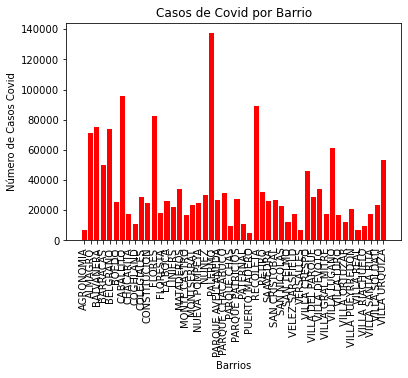

In [55]:
x=[]
for i in range(0,48):
    x+=[i]
labels=['AGRONOMIA', 'ALMAGRO', 'BALVANERA', 'BARRACAS', 'BELGRANO',
       'BOEDO', 'CABALLITO', 'CHACARITA', 'COGHLAND', 'COLEGIALES',
       'CONSTITUCION', 'FLORES', 'FLORESTA', 'LA BOCA', 'LINIERS',
       'MATADEROS', 'MONTE CASTRO', 'MONTSERRAT', 'NUEVA POMPEYA',
       'NUÑEZ', 'PALERMO', 'PARQUE AVELLANEDA', 'PARQUE CHACABUCO',
       'PARQUE CHAS', 'PARQUE PATRICIOS', 'PATERNAL', 'PUERTO MADERO',
       'RECOLETA', 'RETIRO', 'SAAVEDRA', 'SAN CRISTOBAL', 'SAN NICOLAS',
       'SAN TELMO', 'VELEZ SARSFIELD', 'VERSALLES', 'VILLA CRESPO',
       'VILLA DEL PARQUE', 'VILLA DEVOTO', 'VILLA GRAL MITRE',
       'VILLA LUGANO', 'VILLA LURO', 'VILLA ORTUZAR', 'VILLA PUEYRREDON',
       'VILLA REAL', 'VILLA RIACHUELO', 'VILLA SANTA RITA',
       'VILLA SOLDATI', 'VILLA URQUIZA']

plt.bar(x, df['numero_de_caso'], color='red')
plt.xticks(x,labels, rotation ='vertical')
plt.rcParams["figure.figsize"] = (20, 10)
plt.title("Casos de Covid por Barrio")
plt.xlabel('Barrios')
plt.ylabel('Número de Casos Covid')

Text(0, 0.5, 'Número Delitos Violentos')

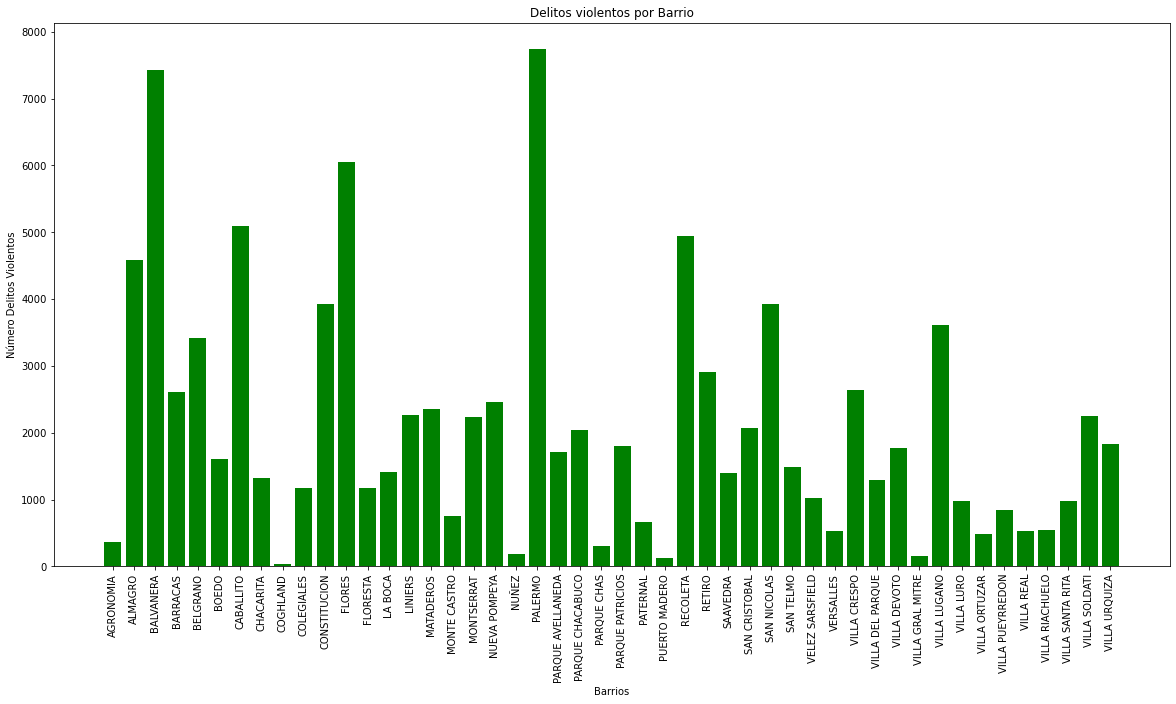

In [56]:
plt.bar(x, df['delito_violento'], color='green')
plt.xticks(x,labels, rotation ='vertical')
plt.rcParams["figure.figsize"] = (20, 10)
plt.title("Delitos violentos por Barrio")
plt.xlabel('Barrios')
plt.ylabel('Número Delitos Violentos')

Text(0, 0.5, 'Número Delitos No Violentos')

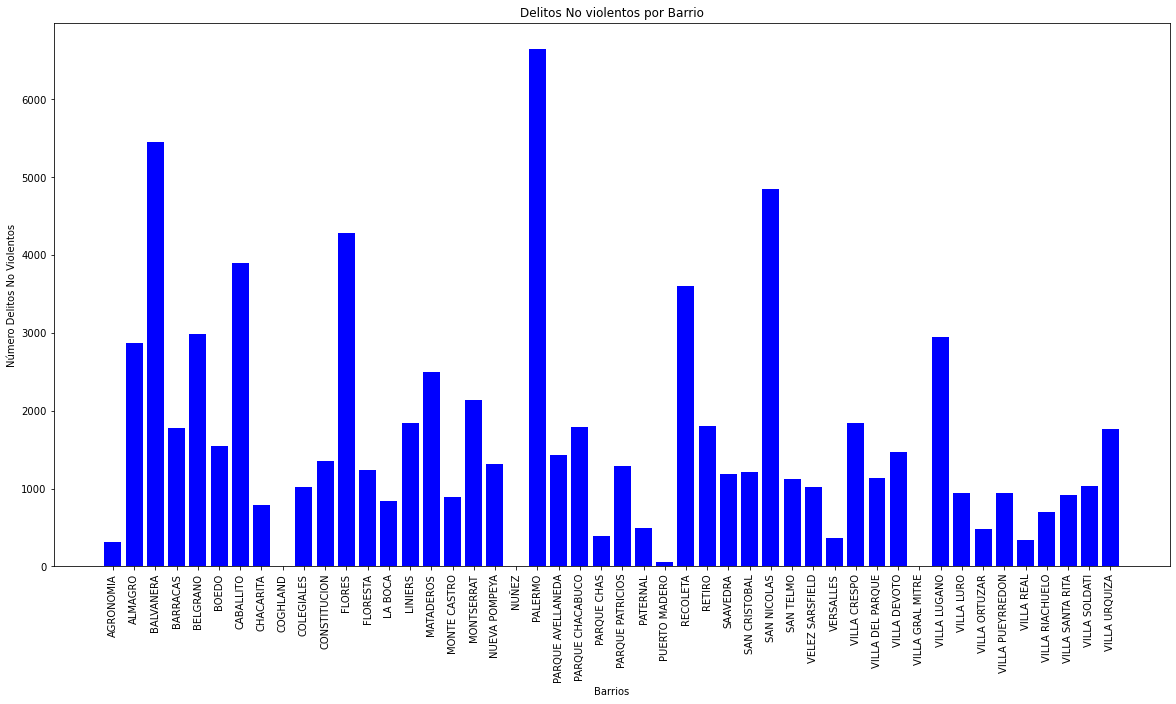

In [57]:
plt.bar(x, df['delito_no_violento'], color='blue')
plt.xticks(x,labels, rotation ='vertical')
plt.rcParams["figure.figsize"] = (20, 10)
plt.title("Delitos No violentos por Barrio")
plt.xlabel('Barrios')
plt.ylabel('Número Delitos No Violentos')

Text(0, 0.5, 'Número de Puntos de Salud')

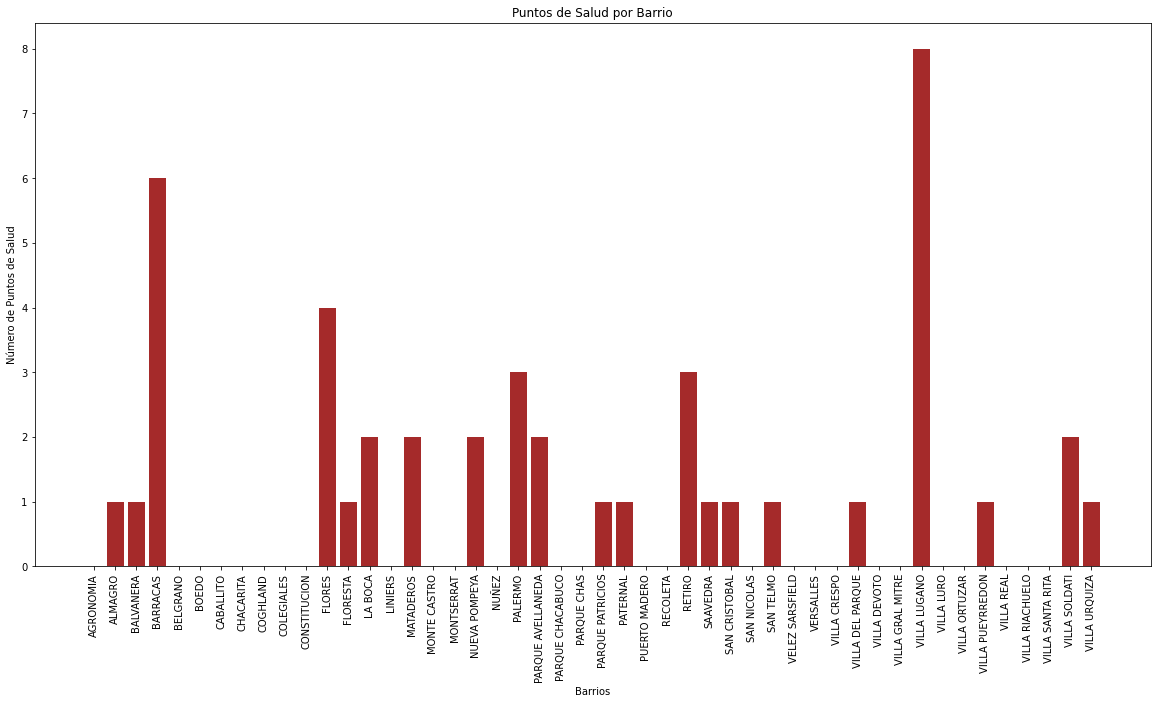

In [58]:
plt.bar(x, df['num_puntos_salud'], color='brown')
plt.xticks(x,labels, rotation ='vertical')
plt.rcParams["figure.figsize"] = (20, 10)
plt.title("Puntos de Salud por Barrio")
plt.xlabel('Barrios')
plt.ylabel('Número de Puntos de Salud')

Text(0, 0.5, 'Número de Pickups de bicis')

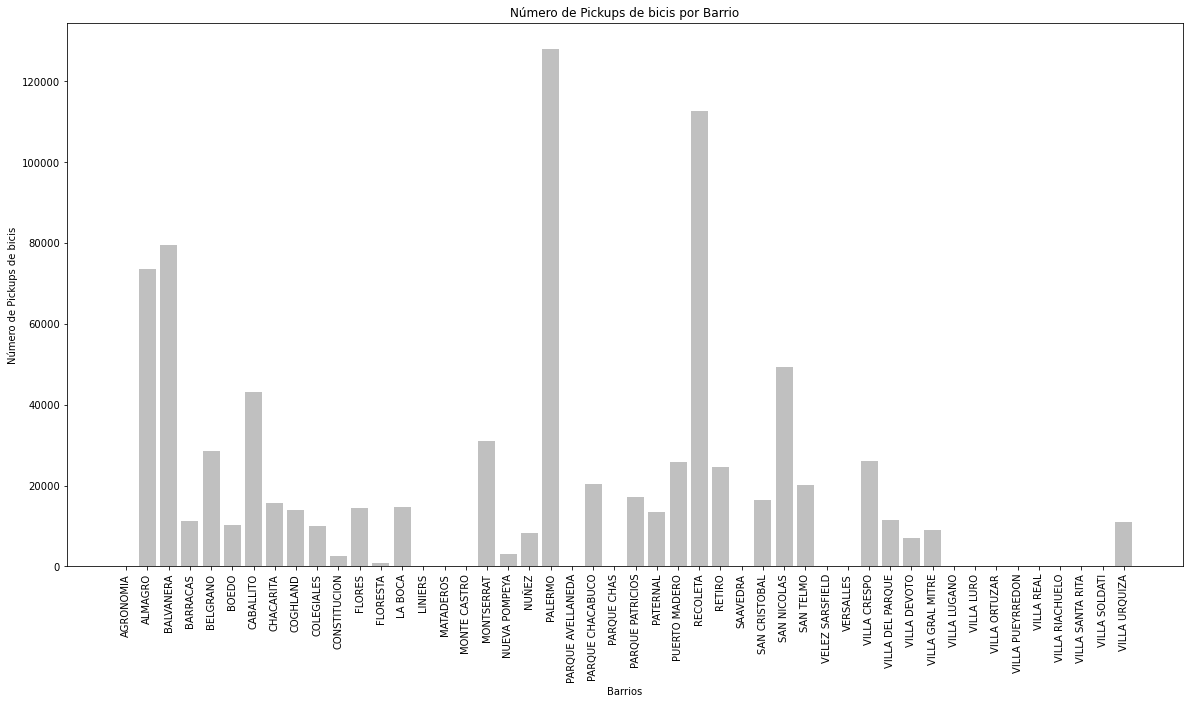

In [59]:
plt.bar(x, df['num_pickups'], color='silver')
plt.xticks(x,labels, rotation ='vertical')
plt.rcParams["figure.figsize"] = (20, 10)
plt.title("Número de Pickups de bicis por Barrio")
plt.xlabel('Barrios')
plt.ylabel('Número de Pickups de bicis')

Text(0, 0.5, 'Número de Dropoffs de bicis')

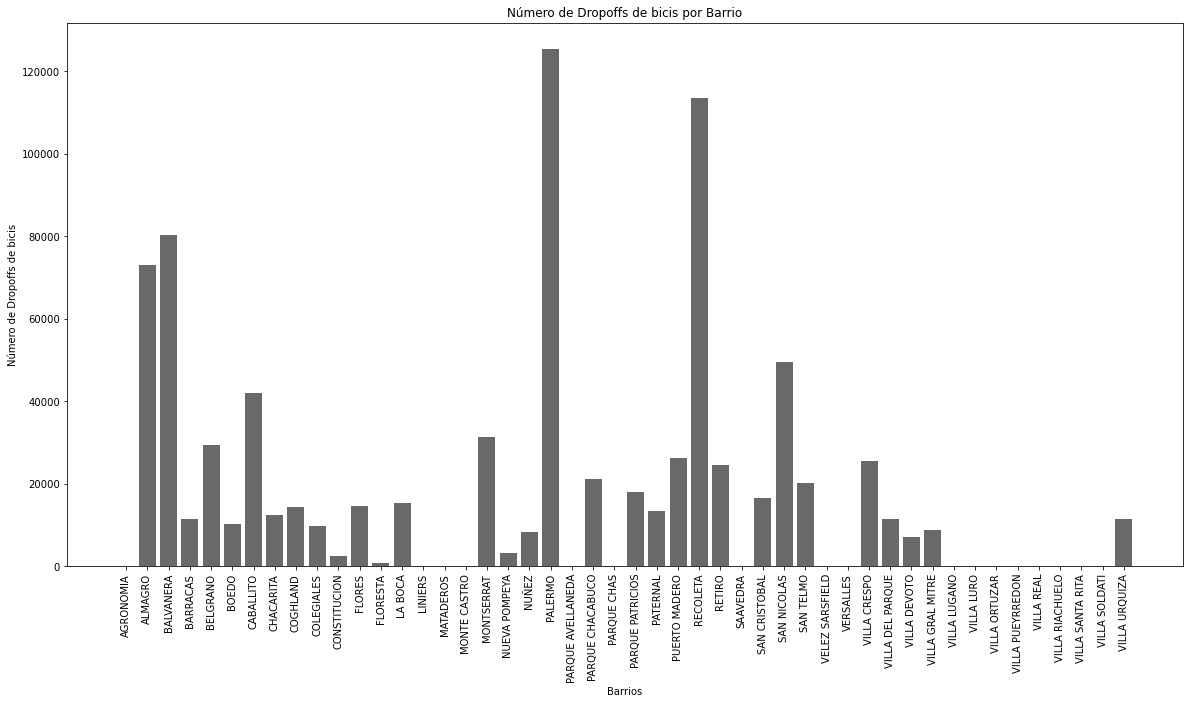

In [60]:
plt.bar(x, df['num_dropoffs'], color='dimgray')
plt.xticks(x,labels, rotation ='vertical')
plt.rcParams["figure.figsize"] = (20, 10)
plt.title("Número de Dropoffs de bicis por Barrio")
plt.xlabel('Barrios')
plt.ylabel('Número de Dropoffs de bicis')

## Choroplets

In [61]:
geojson = open("barrios.geojson")
geojson = json.load(geojson)

In [62]:
geojson["features"][0]["properties"]['barrio']

'CHACARITA'

In [65]:
m = folium.Map(location=[-34.60,-58.37], zoom_start= 11.6)
folium.Choropleth(
    geo_data = geojson,
    name = "choropleth",
    data = df,
    columns = ["barrio", "delito_violento"],
    key_on= "feature.properties.barrio",
    fill_color = "Blues",
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = "Num Delitos",
    nan_fill_color = "white"
).add_to(m)

folium.LayerControl().add_to(m)

In [67]:
m_1 = folium.Map(location=[-34.60,-58.37], zoom_start= 11.6)
folium.Choropleth(
    geo_data = geojson,
    name = "choropleth",
    data = df,
    columns = ["barrio", "delito_violento"],
    key_on= "feature.properties.barrio",
    fill_color = "Blues",
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = "Num Delitos",
    nan_fill_color = "white"
).add_to(m_1)

folium.LayerControl().add_to(m_1)

In [68]:
display(m,m_1)

In [ ]:
m.save("DelitosChoropleth.html")

In [ ]:
m1 = folium.Map(location=[-34.60,-58.37], zoom_start= 11.6)
folium.Choropleth(
    geo_data = geojson,
    name = "choropleth",
    data = df,
    columns = ["barrio", "numero_de_caso"],
    key_on= "feature.properties.barrio",
    fill_color = "Reds",
    fill_opacity = 0.8,
    line_opacity = 0.2,
    legend_name = "Num Casos Covid",
    nan_fill_color = "white"
).add_to(m1)

folium.LayerControl().add_to(m1)

In [ ]:
m1

In [ ]:
m1.save("CovidChoropleth.html")